In [2]:
#http://soft-matter.github.io/trackpy/v0.3.2/tutorial/walkthrough.html


from __future__ import division, unicode_literals, print_function  # for compatibility with Python 2 and 3

import matplotlib as mpl
import matplotlib.pyplot as plt

# change the following to %matplotlib notebook for interactive plotting
%matplotlib inline

# Optionally, tweak styles.
#mpl.rc('figure',  figsize=(10, 6))
#mpl.rc('image', cmap='gray')

import numpy as np
import pandas as pd
from pandas import DataFrame, Series  # for convenience

import pims


![title](figures/fig_tube3_functionExplain_getTubeEnvelope.png)

In [3]:
#for each y line in a frame, give the line to the get_max_and_envelope_indexes(line) function
def getTubeEnvelope(frame):
    #print("<getTubeEnvelopeFrame>")
    #plt.imshow(frame,cmap='gray')
    #print("</getTubeEnvelopeFrame>")
    #plt.show()
    output = np.zeros((len(frame),4))
    
    for i in range(0,len(frame)):
        
        # do a window average
        w=10
        if(i-w>0 and i+w<len(frame)):
            xlimits = (i-w,i+w)
        else:
            xlimits = (i,i)
        ylimits = (0,250)
        tubedata = frame[xlimits[0]:xlimits[1],ylimits[0]:ylimits[1]]
#        plt.imshow(tubedata)
#        plt.show()
        line = np.average(tubedata,axis=0)
    
        #print("<getTubeEnvelopeFrame plotLine>")
        #plt.plot(line)
        #plt.show()
        #print("<getTubeEnvelopeFrame plotLine>")
        #

        result = get_max_and_envelope_indexes(line)

        
        if(len(result)==4):
            output[i][0] = result[0] #l
            output[i][1] = result[1] #mx
            output[i][2] = result[2] #r
            output[i][3] = result[3] #leng
        else:
            l,mx,r,leng = [0,0,0,0]
            output[i][0] = l
            output[i][1] = mx
            output[i][2] = r
            output[i][3] = leng
        
    #    if(l<0):
    #        plt.show()
    #        plt.plot(line)
        
    return output

In [4]:
def get_max_and_envelope_indexes(chnl1_histo):

#    print(chnl1_histo)
#    plt.plot(chnl1_histo)
#    plt.show()
    if(len(chnl1_histo)==0):
        return([])
    else:
        
        chnl1_max = np.max(chnl1_histo)

        #print(np.where(chnl1_histo == chnl1_max))
        # get the index from the maximum
        maxIndex = np.argmax(chnl1_histo)
    #    meanIntensity = np.sum(chnl1_histo)

        roundingPrecision = 1

        # get the index of the rightmost index left to the maximum
        #print(np.where(np.round(chnl1_histo[0:maxIndex]/chnl1_max,1) == 0.5))
        leftOfMax = np.where(np.round(chnl1_histo[0:maxIndex]/chnl1_max,roundingPrecision) <= 0.5)
        if(len(leftOfMax[0]))!=0:
            leftOfMaxIndex = leftOfMax[0][-1]
        else:
            leftOfMaxIndex = -1
        #print(leftOfMaxIndex)

        # get the index of the leftmost index right to the maximum
        #print(np.where(np.round(chnl1_histo[maxIndex:-1]/chnl1_max,1) == 0.5))
        rightOfMax = np.where(np.round(chnl1_histo[maxIndex:-1]/chnl1_max,roundingPrecision) <= 0.5)
        if(len(rightOfMax[0]))!=0:
            rightOfMaxIndex = maxIndex + rightOfMax[0][0]
        else:
            rightOfMaxIndex = -1
        #print(rightOfMaxIndex)

        return([leftOfMaxIndex,maxIndex,rightOfMaxIndex,rightOfMaxIndex-leftOfMaxIndex])

In [5]:
def printTubeEnvelope(envelope):
    print("<printTubeEnvelope>")
    plt.figure(figsize=(6, 6), dpi=80)
    plt.plot(envelope[:,0])
    plt.plot(envelope[:,1])
    plt.plot(envelope[:,2])
    plt.show()
    print("</printTubeEnvelope>")

In [6]:
# arguemnts:
# guessed tube midpoint
# guessed window in which the tube is nice and clean

def compute_tube_attachment_point_on_vesicle_y(tresholdedFrame, tubeMidPoint_y,tubeWindow_y,threshold = 1.33):
    # get the fwhm of the tube

    guessedTubeMidpoint = tubeMidPoint_y
    xlimits = (0,len(tresholdedFrame))
    w = 1
    ylimits = (int(tubeMidPoint_y)-w,int(tubeMidPoint_y)+w)
    tubedata = tresholdedFrame[xlimits[0]:xlimits[1],ylimits[0]:ylimits[1]]
    plt.plot(np.sum(tubedata,axis=1))
    
    
    
    # go from the tube midpoint to the right and take the point where it is not zero
    attachmentPoint_y = guessedTubeMidpoint + np.min(np.where(np.sum(tubedata,axis=1)[guessedTubeMidpoint:-1]==0))
    plt.axvline(x=attachmentPoint_y,c='k')
    plt.show()
    return attachmentPoint_y





# get the high point next to the bead






    

In [7]:
# arguemnts:
# guessed tube midpoint
# guessed window in which the tube is nice and clean

def compute_tube_attachment_point_on_bead_y_threshold(tresholdedFrame, tubeMidPoint_y,tubeWindow_y,threshold = 1.33):
    # get the fwhm of the tube

    guessedTubeMidpoint = tubeMidPoint_y
    xlimits = (0,len(tresholdedFrame))
    w = 1
    ylimits = (int(tubeMidPoint_y)-w,int(tubeMidPoint_y)+w)
    tubedata = tresholdedFrame[xlimits[0]:xlimits[1],ylimits[0]:ylimits[1]]
    plt.plot(np.sum(tubedata,axis=1))
    
    
    
    # go from the tube midpoint to the left and take the point where it is not zero
    print(np.where(np.sum(tubedata,axis=1)[0:guessedTubeMidpoint]==0))
    attachmentPoint_y = np.max(np.where(np.sum(tubedata,axis=1)[0:guessedTubeMidpoint]==0))
    plt.axvline(x=attachmentPoint_y,c='k')
    plt.show()
    return attachmentPoint_y





# get the high point next to the bead






    

In [8]:
#parameters
# guessed midpoint of the tube in y
# transmitted detector frame
def compute_tube_attachment_point_on_bead_y(td_image,tubeMidPoint_y, tubeMidpoint_x):
    guessedTubeMidpoint = tubeMidPoint_y
    ylimits = (0,tubeMidPoint_y)
    w = 1
    xlimits = (int(tubeMidpoint_x)-w,int(tubeMidpoint_x)+w)
    tubedata = td_image[ylimits[0]:ylimits[1],xlimits[0]:xlimits[1]]
    plt.plot(np.sum(tubedata,axis=1))
    
    
    
    # go from the max intensity which is the bead
    beadMax = np.argmax(np.sum(tubedata,axis=1))
    #now search for the minimum right of that
    beadMin_right = beadMax+ np.argmin(np.sum(tubedata,axis=1)[beadMax:-1])
    
    # go from that position to the tube midpoint and geht the hump
    beadHump_right = beadMin_right+ np.argmax(np.sum(tubedata,axis=1)[beadMin_right:-1])
    
    # take the middle between miminum and hump
    attachmentY = int((beadMin_right+beadHump_right)/2)
    
    
    plt.axvline(x=attachmentY,c='k')
    plt.show()
    return(attachmentY)




In [9]:
def get_tube_midpoint_x(tubeEnvelope,tubeMidPoint_y, tubeWindow_y):
    maxima=tubeEnvelope[:,1]
    bottomIndex = tubeMidPoint_y-tubeWindow_y
    maximaBottom = maxima[bottomIndex]
    topIndex =tubeMidPoint_y+tubeWindow_y
    maximaTop = maxima[topIndex]
    meanmax = int((maximaBottom+maximaTop)/2)
    return(meanmax)

In [10]:
def get_tube_x(tubeEnvelope,y):
    return int((tubeEnvelope[:,0][y]+tubeEnvelope[:,2][y])/2)
    # this kills me
#    return tubeEnvelope[:,1][y]

In [11]:
def get_tube_lenght(beadPoint,vesiclePoint):
    return np.linalg.norm(np.array(beadAttachmentVector)-np.array(vesicleAttachmentVector))

In [40]:
#membrane channel
frames = pims.TiffStack_pil('/Users/johannesschoeneberg/Desktop/PostDoc/hurley_lab/pulling_confleezers_dataSharing_local/2018-06-05_movie1/movie_ch0_avg20_zoomVesicle.tif') 
#membrane channel | debleached, maxentropy tresholded
framest = pims.TiffStack_pil('/Users/johannesschoeneberg/Desktop/PostDoc/hurley_lab/pulling_confleezers_dataSharing_local/2018-06-05_movie1/movie_ch0_avg20_zoomVesicle_debleach_mxEnt.tif') 
#transmitted detector
framesg = pims.TiffStack_pil('/Users/johannesschoeneberg/Desktop/PostDoc/hurley_lab/pulling_confleezers_dataSharing_local/2018-06-05_movie1/movie_ch3_avg20_zoomVesicle.tif')
#transmitted detector | maxFiltered, yen tresholded
framestb = pims.TiffStack_pil('/Users/johannesschoeneberg/Desktop/PostDoc/hurley_lab/pulling_confleezers_dataSharing_local/2018-06-05_movie1/movie_ch3_avg20_maxFiltered2px_yenTresholded.tif')

tubeMidPoint_y = 82
tubeWindow_y = 3 #lenght in px up and down from the midpoint where the tube is ok


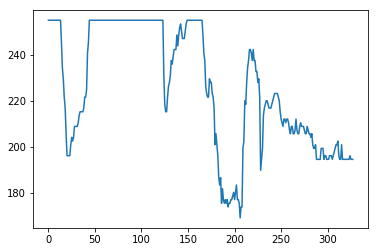

In [47]:
A = np.average(framest[200],axis=1)
B = np.average(framestb[200],axis=1)
def min_combine(A,B):
    C = []
    for i in range(0,len(A)):
        C.append(min(A[i],B[i]))
    return C

C = min_combine(A,B)

plt.plot(C)

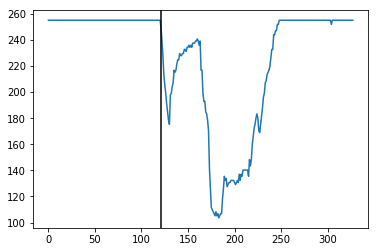

43


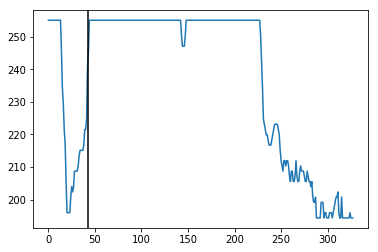

In [28]:
tubeMidpoint_y = 70

plt.plot(np.average(framest[200],axis=1))
# go from the tube midpoint to the right and find the point where it is not 255
y_tube_attachmentPoint = tubeMidpoint_y+np.where(np.average(framest[200],axis=1)[tubeMidpoint_y:-1]!=255)[0][0]
plt.axvline(y_tube_attachmentPoint,c='k')
plt.show()


plt.plot(np.average(framestb[200],axis=1))
# go from the tube midpoint to the left and find the point where it is not 255
y_bead_attachmentPoint = np.where(np.average(framestb[200],axis=1)[0:tubeMidpoint_y]!=255)[0][-1]
print(y_bead_attachmentPoint)
plt.axvline(y_bead_attachmentPoint,c='k')
plt.show()

############### 950
<printTubeEnvelope>


/Users/johannesschoeneberg/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:1110: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/johannesschoeneberg/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/Users/johannesschoeneberg/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in less_equal


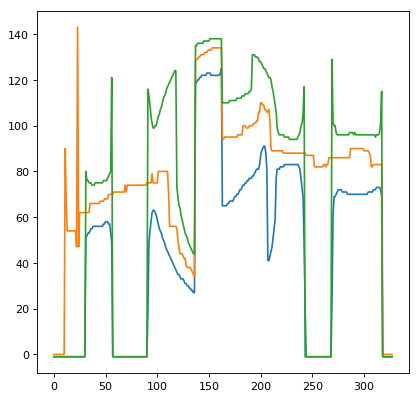

</printTubeEnvelope>
72


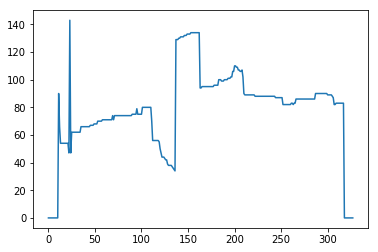

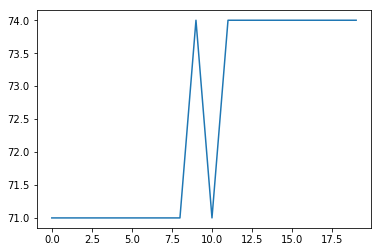

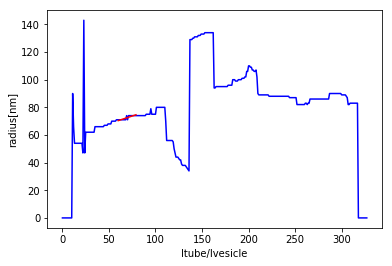

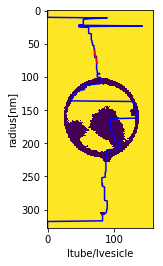

beadAttachmentPoint [43, 66]
vesicleAttachmentPoint [104, 79]


In [14]:
# get the tube envelope

frameId = 950
beadAdditionalMargin = 5
analysisResult = []
i = frameId
print("############### "+str(i))
tubeEnvelope = getTubeEnvelope(frames[i])
printTubeEnvelope(tubeEnvelope)

tubeMidpoint_x = get_tube_midpoint_x(tubeEnvelope,tubeMidPoint_y,tubeWindow_y)
print(tubeMidpoint_x)


#### find how far we can go left and right from the midpoint guess




####

plt.plot(tubeEnvelope[:,1])
plt.show()
tubeMidPoint_y =70
tubeWindow_y = 10
tubeMaxEnvelope = (tubeEnvelope[:,1])[tubeMidPoint_y-tubeWindow_y:tubeMidPoint_y+tubeWindow_y]

plt.plot(tubeMaxEnvelope)
plt.show()

# fit the tube line
from scipy import stats

xx=range(tubeMidPoint_y-tubeWindow_y,tubeMidPoint_y+tubeWindow_y)
yy=tubeMaxEnvelope
slope, intercept, r, prob2, see = stats.linregress(xx, yy)



plt.plot(tubeEnvelope[:,1],label='original data',color='b')
plt.plot(xx, intercept + slope*xx, 'r', label='fitted line')
plt.xlabel('Itube/Ivesicle')
plt.ylabel('radius[nm]')
plt.show()

plt.imshow(framest[i])
plt.plot(tubeEnvelope[:,1],range(0,len(tubeEnvelope[:,1])),label='original data',color='b')
plt.plot(intercept + slope*xx, xx,'r', label='fitted line')
plt.xlabel('Itube/Ivesicle')
plt.ylabel('radius[nm]')
plt.show()

######

# walk towards the bead along the fitted line until you hit it
x_TubeExploringStartingPoint = 70

didIHitTheBeadYet = 255
xtest = x_TubeExploringStartingPoint
while(didIHitTheBeadYet == 255):
    
    ytest = int(intercept + slope*xtest)
    
    didIHitTheBeadYet = framestb[i][xtest,ytest] #255 = no, 0=yes
    
    #print(xtest,ytest,didIHitTheVesicleYet)
    xtest = xtest-1
beadAttachmentPoint=[xtest,ytest]
print("beadAttachmentPoint",beadAttachmentPoint)



# walk towards the vesicle along the fitted line until you hit it

didIHitTheVesicleYet = 255
xtest = 60
while(didIHitTheVesicleYet == 255):
    
    ytest = int(intercept + slope*xtest)
    
    didIHitTheVesicleYet = framest[i][xtest,ytest] #255 = no, 0=yes
    
    #print(xtest,ytest,didIHitTheVesicleYet)
    xtest = xtest+1
vesicleAttachmentPoint=[xtest,ytest]
print("vesicleAttachmentPoint",vesicleAttachmentPoint)

############### 0


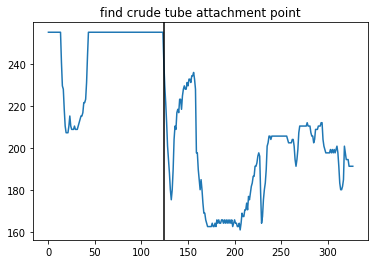

42


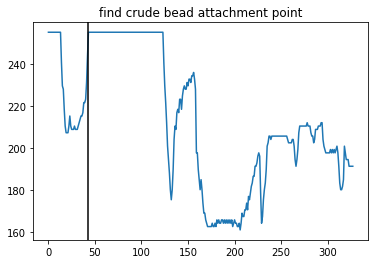

new tube midpoint:  83


/Users/johannesschoeneberg/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:1110: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/johannesschoeneberg/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/Users/johannesschoeneberg/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in less_equal


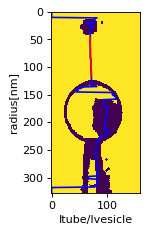

beadAttachmentPoint [45, 69]
vesicleAttachmentPoint [120, 71]
tube length [px]: 75.0266619276


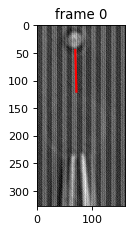

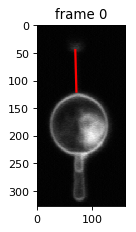

############### 1


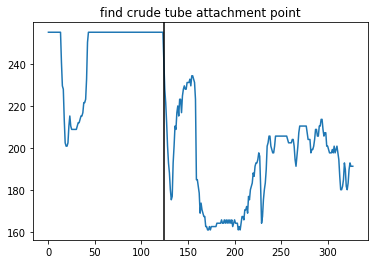

42


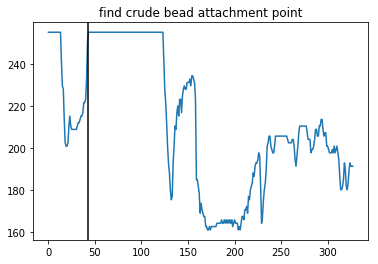

new tube midpoint:  83


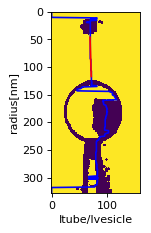

beadAttachmentPoint [45, 69]
vesicleAttachmentPoint [120, 71]
tube length [px]: 75.0266619276


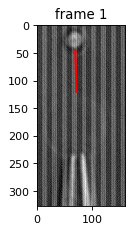

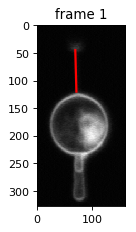

############### 2


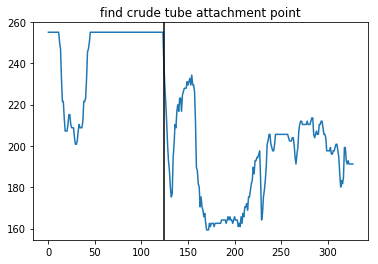

44


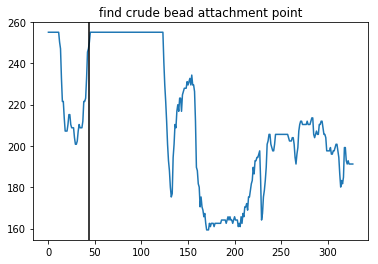

new tube midpoint:  84


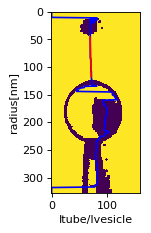

beadAttachmentPoint [47, 69]
vesicleAttachmentPoint [120, 71]
tube length [px]: 73.027392121


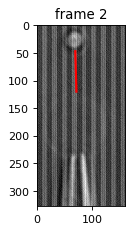

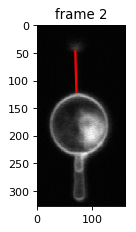

############### 3


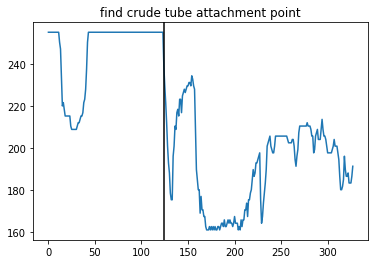

42


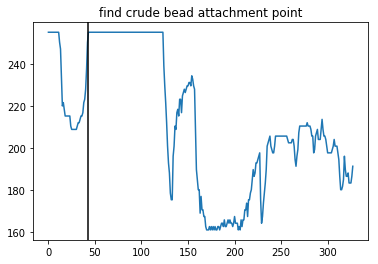

new tube midpoint:  83


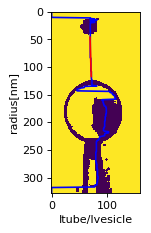

beadAttachmentPoint [45, 69]
vesicleAttachmentPoint [120, 71]
tube length [px]: 75.0266619276


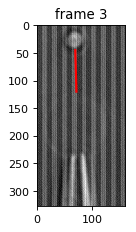

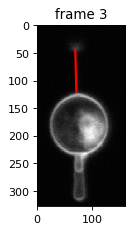

############### 4


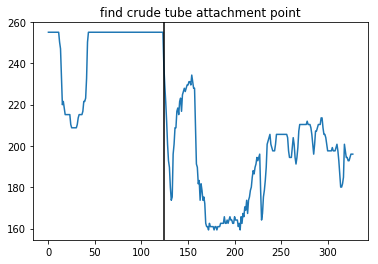

42


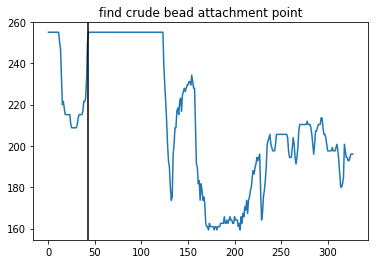

new tube midpoint:  83


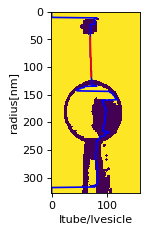

beadAttachmentPoint [45, 69]
vesicleAttachmentPoint [120, 71]
tube length [px]: 75.0266619276


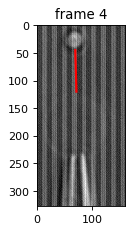

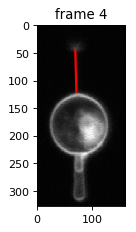

############### 5


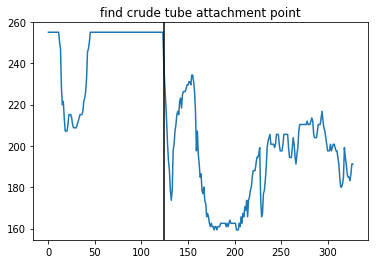

44


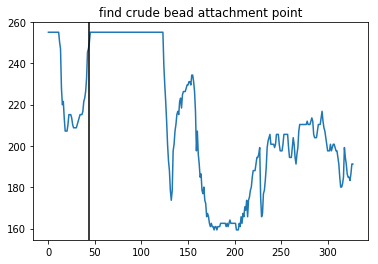

new tube midpoint:  84


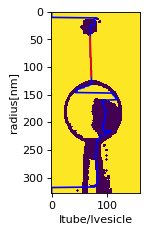

beadAttachmentPoint [47, 69]
vesicleAttachmentPoint [120, 72]
tube length [px]: 73.0616178304


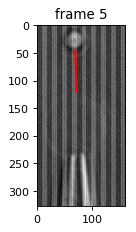

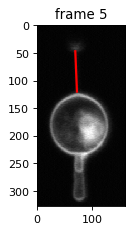

############### 6


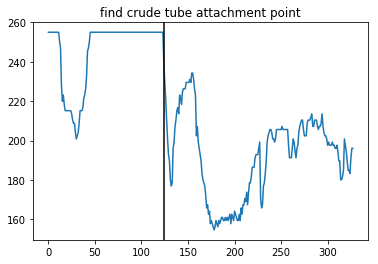

44


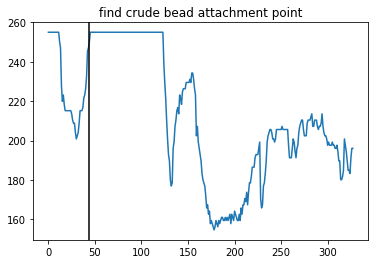

new tube midpoint:  84


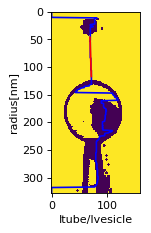

beadAttachmentPoint [47, 69]
vesicleAttachmentPoint [120, 72]
tube length [px]: 73.0616178304


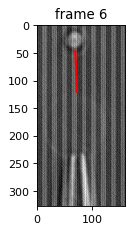

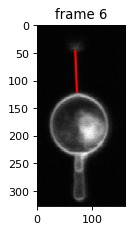

############### 7


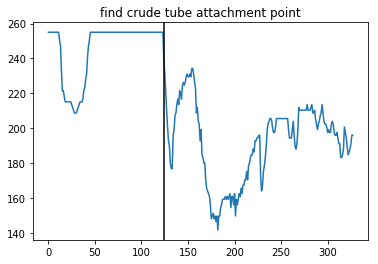

44


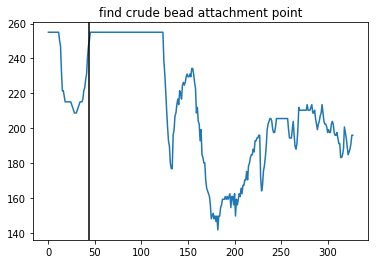

new tube midpoint:  84


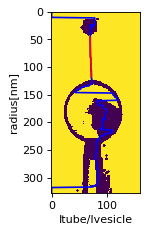

beadAttachmentPoint [47, 69]
vesicleAttachmentPoint [120, 72]
tube length [px]: 73.0616178304


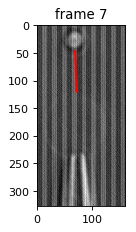

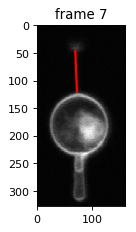

############### 8


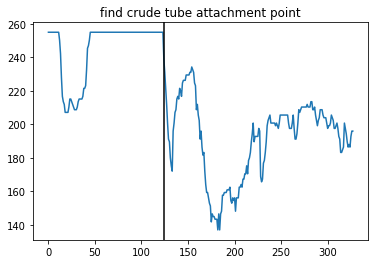

44


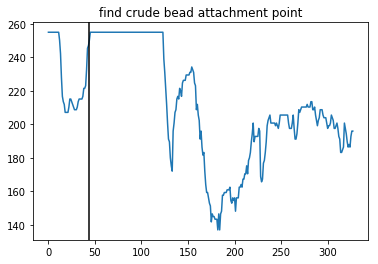

new tube midpoint:  84


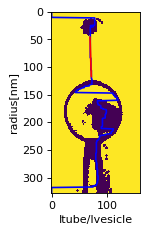

beadAttachmentPoint [47, 69]
vesicleAttachmentPoint [120, 72]
tube length [px]: 73.0616178304


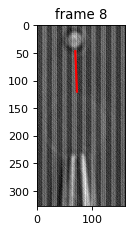

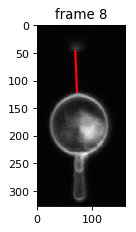

############### 9


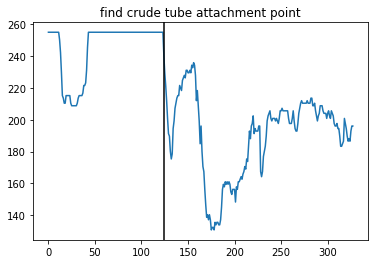

42


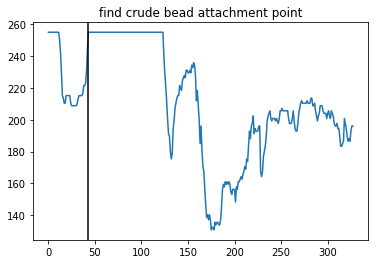

new tube midpoint:  83


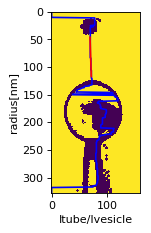

beadAttachmentPoint [45, 69]
vesicleAttachmentPoint [120, 72]
tube length [px]: 75.0599760192


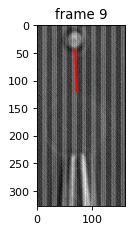

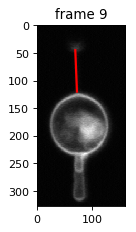

In [67]:
from scipy import stats

#sometimes the thesholding leads to the tube vector going one or two pixel 
#too dep into the vesicle or the bead. Correct for that by adjusting these margins.
#think if it as these pixels get subtracted from the tube length
beadAdditionalMargin = 5
vesicleAdditionaMargin = 5

# this is the initial guess.
# the guess is 
tubeMidPoint_y =82



analysisResult = []
#for i in range(0,len(frames)):
for i in range(0,10):
    try:
        
        print("############### "+str(i))
        
        # normally, we can use them separately.
        # sometimes, in case of a vesciels within the tube, we have to combine them
        #frameTestBead = framestb[i]
        #frameTestVesicle = framest[i]
        
        frameTestBead = np.fmin(framestb[i],framest[i])
        frameTestVesicle = frameTestBead
        
        
        
        ###### 1)
        # get an idea what the real midpoint is and how long the tube is as a first guess
        

        # go from the tube midpoint to the right and find the point where it is not 255
        y_tube_attachmentPoint = tubeMidpoint_y+np.where(np.average(frameTestVesicle,axis=1)[tubeMidpoint_y:-1]!=255)[0][0]
        plt.plot(np.average(frameTestVesicle,axis=1))
        plt.axvline(y_tube_attachmentPoint,c='k')
        plt.title('find crude tube attachment point')
        plt.show()

        
        # go from the tube midpoint to the left and find the point where it is not 255
        y_bead_attachmentPoint = np.where(np.average(frameTestBead,axis=1)[0:tubeMidpoint_y]!=255)[0][-1]
        print(y_bead_attachmentPoint)
        plt.plot(np.average(frameTestBead,axis=1))
        plt.axvline(y_bead_attachmentPoint,c='k')
        plt.title('find crude bead attachment point')
        plt.show()
        
        
        tubeLengthCrude = y_tube_attachmentPoint-y_bead_attachmentPoint
        tubeMidpoint_y = y_bead_attachmentPoint+ int((y_tube_attachmentPoint-y_bead_attachmentPoint)/2)
        print('new tube midpoint: ',tubeMidpoint_y)
        
        ###### 2)
        # calculate the tube envelope from fluorescence intensity to get the right angle

        tubeEnvelope = getTubeEnvelope(frames[i])
        #printTubeEnvelope(tubeEnvelope)
        
        tubeMidpoint_x = get_tube_midpoint_x(tubeEnvelope,tubeMidPoint_y,tubeWindow_y)
        #print(tubeMidpoint_x)
        
        ###### 2.1)
        # crop a part of the tube to do a linear fit for the angle estimation
        

        # crop the part of the tube out to do fitting with
        tubeWindow_y = int(0.9*tubeLengthCrude/2)
        tubeMaxEnvelope = (tubeEnvelope[:,1])[tubeMidPoint_y-tubeWindow_y:tubeMidPoint_y+tubeWindow_y]
                
        #fitting
        xx=range(tubeMidPoint_y-tubeWindow_y,tubeMidPoint_y+tubeWindow_y)
        yy=tubeMaxEnvelope
        slope, intercept, r, prob2, see = stats.linregress(xx, yy)
        
        fig = plt.figure(figsize=(3, 3), dpi=80)
        plt.imshow(frameTestVesicle)
        plt.plot(tubeEnvelope[:,1],range(0,len(tubeEnvelope[:,1])),label='original data',color='b')
        plt.plot(intercept + slope*xx, xx,'r', label='fitted line')
        plt.xlabel('Itube/Ivesicle')
        plt.ylabel('radius[nm]')
        plt.show()
        fig.savefig("./output2/tube__calculate_tube_vector/frame_"+str(i)+"_calc.png")
        
        ###### 3)
        # from the fit line explore towards bead and vesicle to find the tube endpoints
        
        # walk towards the bead along the fitted line until you hit it
        x_TubeExploringStartingPoint = 70
        
        didIHitTheBeadYet = 255
        xtest = x_TubeExploringStartingPoint
        while(didIHitTheBeadYet == 255):
            
            ytest = int(intercept + slope*(xtest-beadAdditionalMargin))
            
            didIHitTheBeadYet = frameTestBead[(xtest-beadAdditionalMargin),ytest] #255 = no, 0=yes
            
            #print(xtest,ytest,didIHitTheVesicleYet)
            xtest = xtest-1
        beadAttachmentVector=[xtest,ytest]
        print("beadAttachmentPoint",beadAttachmentVector)
        
        
        
        # walk towards the vesicle along the fitted line until you hit it
        
        didIHitTheVesicleYet = 255
        xtest = 60
        while(didIHitTheVesicleYet == 255):
            
            ytest = int(intercept + slope*(xtest+vesicleAdditionaMargin))
            
            didIHitTheVesicleYet = frameTestVesicle[(xtest+vesicleAdditionaMargin),ytest] #255 = no, 0=yes
            
            #print(xtest,ytest,didIHitTheVesicleYet)
            xtest = xtest+1
        vesicleAttachmentVector=[xtest,ytest]
        print("vesicleAttachmentPoint",vesicleAttachmentVector)
        
        ###### 4) 
        # final processing, data collection and plotting
        
        tubeLenght = get_tube_lenght(beadAttachmentVector,vesicleAttachmentVector)
        print("tube length [px]:",tubeLenght)
        
        fig = plt.figure(figsize=(3, 3), dpi=80)
        plt.imshow(framesg[i],cmap='gray')
        #plot([x1, x2], [y1, y2], color='k', linestyle='-', linewidth=2)
        plt.plot([beadAttachmentVector[1], vesicleAttachmentVector[1]],
                 [beadAttachmentVector[0], vesicleAttachmentVector[0]], 'r-', lw=2)
        plt.title("frame "+str(i))
        plt.show()

        fig.savefig("./output2/tube__calculate_tube_vector/frame_"+str(i)+"_membrane.png")
        
        fig = plt.figure(figsize=(3, 3), dpi=80)
        plt.imshow(frames[i],cmap='gray')
        #plot([x1, x2], [y1, y2], color='k', linestyle='-', linewidth=2)
        plt.plot([beadAttachmentVector[1], vesicleAttachmentVector[1]],
                 [beadAttachmentVector[0], vesicleAttachmentVector[0]], 'r-', lw=2)
        plt.title("frame "+str(i))
        plt.show()
        fig.savefig("./output2/tube__calculate_tube_vector/frame_"+str(i)+"_TD.png")
        
        analysisResult.append(np.array([tubeLenght,vesicleAttachmentVector[0],vesicleAttachmentVector[1],beadAttachmentVector[0],beadAttachmentVector[1]]))
    except (ValueError,IndexError) as e:
        print("Oops!  That was no valid number.  Try again...")
        analysisResult.append(np.zeros(5))
    

In [64]:
# output

if(False):


    df = pd.DataFrame(analysisResult)
    df.to_csv("./output2/tube_vector_pandas.csv",
              header=['tubeLenght',"vesicleAttachmentVector[0]",'vesicleAttachmentVector[1]','beadAttachmentVector[0]','beadAttachmentVector[1]'])



Text(0,0.5,'length [px]')

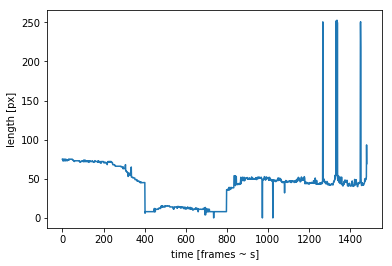

In [68]:
df_analysisResult = pd.read_csv("./output2/tube_vector_pandas.csv")
df_analysisResult['tubeLenght'].plot()
plt.xlabel("time [frames ~ s]")
plt.ylabel("length [px]")